# BRCA Stage Specific Survival

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import openpyxl


%matplotlib inline

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_excel("BRCA_HER2+_Main.xlsx", sheet_name = 0, index_col = 0)
df

We decided to summarize low stages (I and II) and advanced stages (III and IV) due to their similar clinical outcomes. 

In [4]:
# input of survival times and event records into the lifelines kaplan meier fitter
T = df["OS_Time_nature2012"]
E = df["OS_event_nature2012"]
kmf = KaplanMeierFitter()

# summarizing stages I and II as low stages
ls = ((df["AJCC_Stage_nature2012"]== "Stage I")|(df["AJCC_Stage_nature2012"]== "Stage II"))

# summarizing stages III and IV as advanced stages
hs = ((df["AJCC_Stage_nature2012"]== "Stage III")|(df["AJCC_Stage_nature2012"]== "Stage IV"))



In [5]:
#comparing stage specific survival between low and advanced stages for all patients 

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))

kmf0= KaplanMeierFitter()
ax = kmf0.fit(T[ls], E[ls], label="Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#66b3ff")

kmf1= KaplanMeierFitter()
ax = kmf1.fit(T[hs], E[hs], label="Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#99ff99")

fig.suptitle("BRCA all Stage Specific Survival")
plt.tight_layout()

In [6]:
# logrank test of low stages vs advanced stages
from lifelines.statistics import logrank_test

results = logrank_test(T[ls], T[hs], E[ls], E[hs], alpha=.95)# logrank test of low stages vs high stages

results.print_summary()

Stage III    30
Stage IV      1
Name: AJCC_Stage_nature2012, dtype: int64

Next, we split up the cohort into the clusters from the main analysis and compared stage specific survival.

In [ ]:
#comparing stage specific survival between low and advanced stages by cluster
T = df["OS_Time_nature2012"]
E = df["OS_event_nature2012"]
kmf = KaplanMeierFitter()

ls_0 = (((df["AJCC_Stage_nature2012"]== "Stage I")|(df["AJCC_Stage_nature2012"]== "Stage II"))&(df["Cluster"]==0))
hs_0 = ((df["AJCC_Stage_nature2012"]== "Stage III")|(df["AJCC_Stage_nature2012"]== "Stage IV")&(df["Cluster"]==0))

ls_1 = (((df["AJCC_Stage_nature2012"]== "Stage I")|(df["AJCC_Stage_nature2012"]== "Stage II"))&(df["Cluster"]==1))
hs_1 = (((df["AJCC_Stage_nature2012"]== "Stage III")|(df["AJCC_Stage_nature2012"]== "Stage IV"))&(df["Cluster"]==1))

ls_2 = (((df["AJCC_Stage_nature2012"]== "Stage I")|(df["AJCC_Stage_nature2012"]== "Stage II"))&(df["Cluster"]==2))
hs_2 = (((df["AJCC_Stage_nature2012"]== "Stage III")|(df["AJCC_Stage_nature2012"]== "Stage IV"))&(df["Cluster"]==2))

#plotting all cluster times w/o confidence intervals for visibility

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))

kmf0= KaplanMeierFitter()
ax = kmf0.fit(T[ls_0], E[ls_0], label="Cluster 0: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf1= KaplanMeierFitter()
ax = kmf1.fit(T[hs_0], E[hs_0], label="Cluster 0: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf2= KaplanMeierFitter()
ax = kmf2.fit(T[ls_1], E[ls_1], label="Cluster 1: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf3= KaplanMeierFitter()
ax = kmf3.fit(T[hs_1], E[hs_1], label="Cluster 1: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf4= KaplanMeierFitter()
ax = kmf4.fit(T[ls_2], E[ls_2], label="Cluster 2: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf5= KaplanMeierFitter()
ax = kmf5.fit(T[hs_2], E[hs_2], label="Cluster 2: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)

fig.suptitle("BRCA Stage Specific Survival by Cluster")
plt.savefig(fname = "BRCA_Stage_spec_surv_clusters.svg", format = "svg")
plt.tight_layout()

To test for statistical significances, we compared all groups with log rank tests.

In [50]:


results_ls0_v_hs0 = logrank_test(T[ls_0], T[hs_0], E[ls_0], E[hs_0], alpha=.95)
results_ls1_v_hs1 = logrank_test(T[ls_1], T[hs_1], E[ls_1], E[hs_1], alpha=.95)
results_ls2_v_hs2 = logrank_test(T[ls_2], T[hs_2], E[ls_2], E[hs_2], alpha=.95)

results_ls0_v_ls1 = logrank_test(T[ls_0], T[ls_1], E[ls_0], E[ls_1], alpha=.95)
results_ls0_v_ls2 = logrank_test(T[ls_0], T[ls_2], E[ls_0], E[ls_2], alpha=.95)
results_ls1_v_ls2 = logrank_test(T[ls_1], T[ls_2], E[ls_1], E[ls_2], alpha=.95)

results_hs0_v_hs1 = logrank_test(T[hs_0], T[hs_1], E[hs_0], E[hs_1], alpha=.95)
results_hs0_v_hs2 = logrank_test(T[hs_0], T[hs_2], E[hs_0], E[hs_2], alpha=.95)
results_hs1_v_hs2 = logrank_test(T[hs_1], T[hs_2], E[hs_1], E[hs_2], alpha=.95)

results_ls0_v_hs1 = logrank_test(T[ls_0], T[hs_1], E[ls_0], E[hs_1], alpha=.95)
results_ls0_v_hs2 = logrank_test(T[ls_0], T[hs_2], E[ls_0], E[hs_2], alpha=.95)

results_ls1_v_hs0 = logrank_test(T[ls_1], T[hs_0], E[ls_1], E[hs_0], alpha=.95)
results_ls1_v_hs2 = logrank_test(T[ls_1], T[hs_2], E[ls_1], E[hs_2], alpha=.95)

results_ls2_v_hs0 = logrank_test(T[ls_2], T[hs_0], E[ls_2], E[hs_0], alpha=.95)
results_ls2_v_hs1 = logrank_test(T[ls_2], T[hs_1], E[ls_2], E[hs_1], alpha=.95)

In [51]:
#Comparing low vs advanced stages within each cluster
results_ls0_v_hs0.print_summary()
results_ls1_v_hs1.print_summary() 
results_ls2_v_hs2.print_summary() 

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.02 0.90      0.16

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.20 0.07      3.76

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.33 0.25      2.01

In [65]:
#comparing the low stages between all clusters
results_ls0_v_ls1.print_summary() 
results_ls0_v_ls2.print_summary() 
results_ls1_v_ls2.print_summary() 

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.00 <0.005      7.74

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.60 0.44      1.19

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 1.00     -0.00

In [66]:
# comparing advanced stages between all clusters
results_hs0_v_hs1.print_summary() 
results_hs0_v_hs2.print_summary() 
results_hs1_v_hs2.print_summary() 

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.02 0.89      0.17

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.05 0.83      0.27

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.14 0.71      0.50

In [54]:
# comparing low stage of cluster 0 with advanced stages of the other clusters
results_ls0_v_hs1.print_summary()
results_ls0_v_hs2.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.17 0.28      1.84

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.43 0.51      0.96

In [55]:
# comparing low stage of cluster 1 with advanced stages of the other clusters
results_ls1_v_hs0.print_summary()
results_ls1_v_hs2.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.30 0.04      4.71

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.33 0.07      3.88

In [56]:
# comparing low stage of cluster 2 with advanced stages of the other clusters
results_ls2_v_hs0.print_summary()
results_ls2_v_hs1.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.05 0.15      2.72

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.60 0.11      3.23

To have a clearer picture of the survival differences by cluster, we split up the summary graph from above into low and advanced stages.

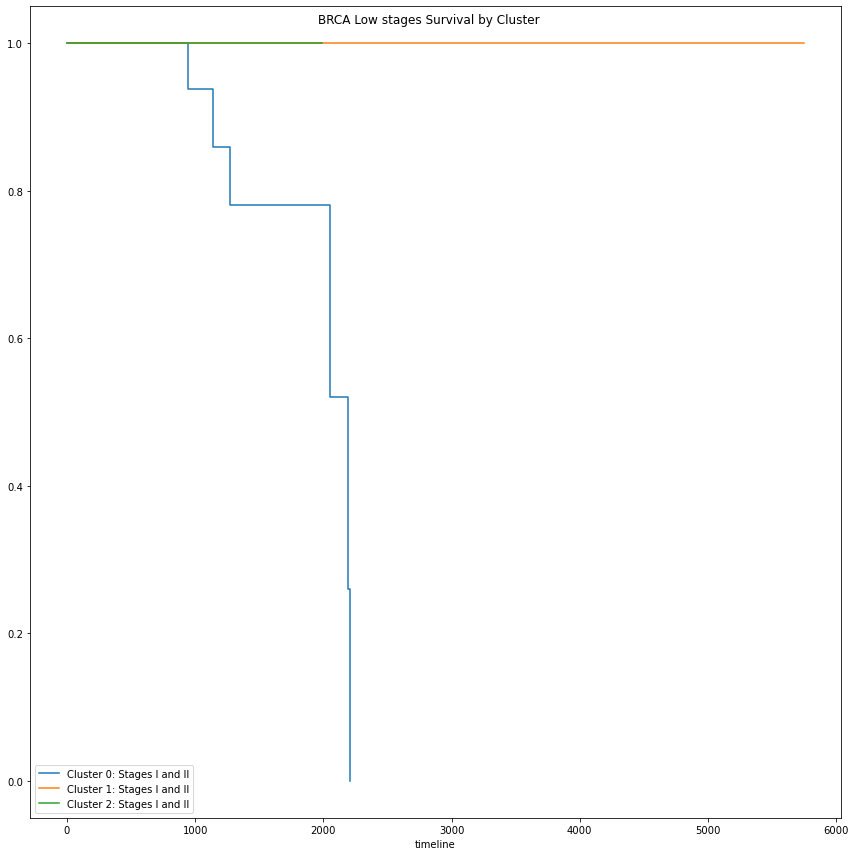

In [64]:
#plotting survival of low stage patients for all clusters

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))

kmf0= KaplanMeierFitter()
ax = kmf0.fit(T[ls_0], E[ls_0], label="Cluster 0: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)



kmf2= KaplanMeierFitter()
ax = kmf2.fit(T[ls_1], E[ls_1], label="Cluster 1: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)



kmf4= KaplanMeierFitter()
ax = kmf4.fit(T[ls_2], E[ls_2], label="Cluster 2: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)


fig.suptitle("BRCA Low stages Survival by Cluster")
plt.savefig(fname = "BRCA_low_Stage_spec_surv_clusters.svg", format = "svg")
plt.tight_layout()

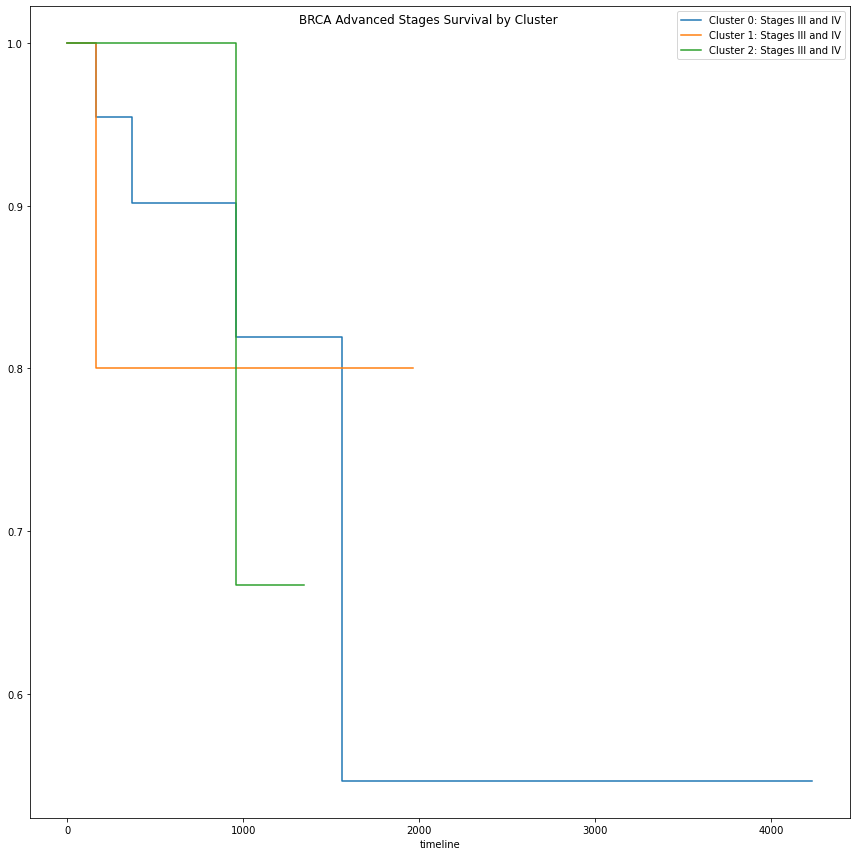

In [63]:
#plotting survival of advanced stage patients for all clusters

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))



kmf1= KaplanMeierFitter()
ax = kmf1.fit(T[hs_0], E[hs_0], label="Cluster 0: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf3= KaplanMeierFitter()
ax = kmf3.fit(T[hs_1], E[hs_1], label="Cluster 1: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)



kmf5= KaplanMeierFitter()
ax = kmf5.fit(T[hs_2], E[hs_2], label="Cluster 2: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)

fig.suptitle("BRCA Advanced Stages Survival by Cluster")
plt.savefig(fname = "BRCA_adv_Stage_spec_surv_clusters.svg", format = "svg")
plt.tight_layout()